In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
pd.__version__

'1.0.3'

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
path = os.path.abspath(os.path.join(os.getcwd(), 
                                    '../dataset_covid/data_gouv/donnees-hospitalieres-covid19-2020-03-25-16h10.csv'))
path = os.path.abspath(os.path.join(os.getcwd(), '../dataset_covid/data_gouv/donnees-hospitalieres-covid19-2020-03-26-13h32.csv'))
df = pd.read_csv(path, sep=";")

In [22]:
df.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


In [23]:
rhin = df[df["dep"]=="68"]

In [24]:
import datetime
dict_data = []
dict_data = df.to_dict()
my_data = {k: [dict_data[k][k1] for k1 in sorted(dict_data[k], key=lambda
x: float(x))] for k in dict_data}
my_data["date"] = [int(datetime.datetime.strptime(x, "%Y-%m-%d").timestamp()/(24*3600)) for x in my_data["jour"]]

In [25]:
indexes_per_department = {}
index_sex = {}
index_days = {}
for k in range(len(my_data["dep"])):
    dep = my_data["dep"][k]
    sex = my_data["sexe"][k]
    day = my_data["date"][k]
    if dep not in indexes_per_department:
        indexes_per_department[dep] = []
    indexes_per_department[dep] += [k]
    if sex not in index_sex:
        index_sex[sex] = []
    index_sex[sex] += [k]
    if day not in index_days:
        index_days[day] = []
    index_days[day] += [k]

In [26]:
datas = ["hosp", "rea", "rad", "dc", 'date']
import numpy as np
for d in datas:
    my_data[d+"_np"] = np.array(my_data[d])

In [27]:
for department in indexes_per_department:
    # departement_of_interest = '68'
    sex = 0
    indexes = [i for i in indexes_per_department[department] if i in index_sex[sex]]
    fig, ax = plt.subplots(1, figsize=(6, 6))
    for data_of_interest in ["rea", "dc", "hosp", "rad"]:
        ax.plot(my_data["date_np"][indexes], my_data[data_of_interest+"_np"][indexes], label=data_of_interest)
        print(data_of_interest, my_data[data_of_interest+"_np"][indexes])
    ax.set_xlabel('date')
    ax.set_ylabel('nb people')
    ax.legend()
    fig.savefig("../images_mess/"+department+"_hospital.png")
    #ax.set_yscale('log')
    #plt.show()

rea [0 0 0 0 1 3 3 6]
dc [0 0 0 0 0 0 0 0]
hosp [ 2  2  2  4  8 17 22 29]
rad [ 1  1  1  1  2  7 11 15]
rea [10 15 19 20 21 23 27 32]
dc [11 19 24 25 28 30 33 34]
hosp [ 41  43  52  61  69  91 107 115]
rad [18 33 40 49 55 62 85 92]
rea [0 0 0 0 0 0 0 0]
dc [0 0 0 0 0 1 1 1]
hosp [ 4  0  1  5  5  9  9 12]
rad [ 1  7 10 10 10 16 16 20]
rea [1 1 1 1 1 1 1 1]
dc [0 0 0 0 0 0 0 0]
hosp [3 3 3 4 4 4 4 8]
rad [ 2  3  3  3  3  3  3 16]
rea [1 1 1 1 1 3 4 4]
dc [0 0 0 0 0 0 1 1]
hosp [ 8 10 13 13 14 19 19 23]
rad [ 9 10 10 10 11 13 16 19]
rea [ 1  5  7  7  8 13 12 17]
dc [2 2 4 6 7 8 8 9]
hosp [25 33 43 46 45 66 55 75]
rad [47 48 61 61 63 63 86 93]
rea [1 2 3 3 3 3 4 5]
dc [0 0 1 1 1 2 3 4]
hosp [12 11 15 15 22 29 37 48]
rad [ 0  0  3  3  3  3  1 34]
rea [0 0 1 1 1 3 3 3]
dc [0 0 0 0 0 0 0 0]
hosp [0 0 1 3 4 6 5 5]
rad [1 1 1 1 1 1 2 2]
rea [1 1 1 1 1 3 3 3]
dc [0 0 0 0 0 0 0 0]
hosp [1 1 2 2 2 3 3 7]
rad [2 2 2 3 3 3 3 4]
rea [0 1 2 2 4 4 4 9]
dc [0 0 0 0 0 2 2 6]
hosp [ 5  6 12 12 21 33 36 44

TypeError: can only concatenate str (not "float") to str

In [36]:
datas = ["hosp", "rea", "rad", "dc"]
aggregated_data = {}
sex = 0
for d in datas:
    aggregated_data[d] = np.array([np.sum(my_data[d+"_np"][[p for p in index_days[k] if p in index_sex[0]]]) for k in                                       sorted(index_days)])
    print(d, aggregated_data[d])
for d in datas:
    aggregated_data["ratio_"+d] = (aggregated_data[d][1:]-aggregated_data[d][:-1])/aggregated_data[d][:-1]
    print("growth ratio", d,  aggregated_data["ratio_"+d])
for d in datas:
    aggregated_data["gratio_"+d] = (aggregated_data[d][2:]-aggregated_data[d][1:-1])/(
                                    aggregated_data[d][1:-1]-aggregated_data[d][:-2])
    print("ratio delta_n+1/delta_n", d,  aggregated_data["gratio_"+d])



hosp [ 2972  4073  5226  5900  6954  8673 10176 12072]
rea [ 771 1002 1297 1453 1674 2080 2516 2935]
rad [ 816 1180 1587 1811 2117 2567 3281 4085]
dc [ 218  327  450  525  632  860 1100 1388]
growth ratio hosp [0.3704576  0.28308372 0.12897053 0.17864407 0.24719586 0.17329644
 0.18632075]
growth ratio rea [0.29961089 0.29441118 0.12027756 0.15209911 0.24253286 0.20961538
 0.16653418]
growth ratio rad [0.44607843 0.34491525 0.14114682 0.16896742 0.21256495 0.2781457
 0.24504724]
growth ratio dc [0.5        0.37614679 0.16666667 0.20380952 0.36075949 0.27906977
 0.26181818]
ratio delta_n+1/delta_n hosp [1.04722979 0.58456201 1.56379822 1.63092979 0.87434555 1.26147705]
ratio delta_n+1/delta_n rea [1.27705628 0.52881356 1.41666667 1.83710407 1.07389163 0.96100917]
ratio delta_n+1/delta_n rad [1.11813187 0.55036855 1.36607143 1.47058824 1.58666667 1.12605042]
ratio delta_n+1/delta_n dc [1.12844037 0.6097561  1.42666667 2.13084112 1.05263158 1.2       ]


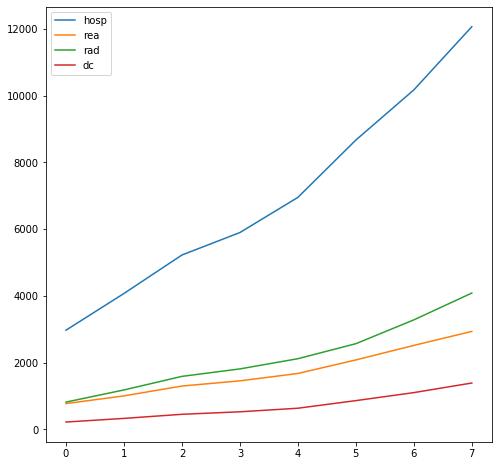

In [30]:
fig, ax = plt.subplots(1, figsize=(8,8))
for d in ["hosp", "rea", "rad", "dc"]:
    ax.plot(aggregated_data[d], label=d)
plt.legend()
#ax.set_yscale('log')
plt.show()

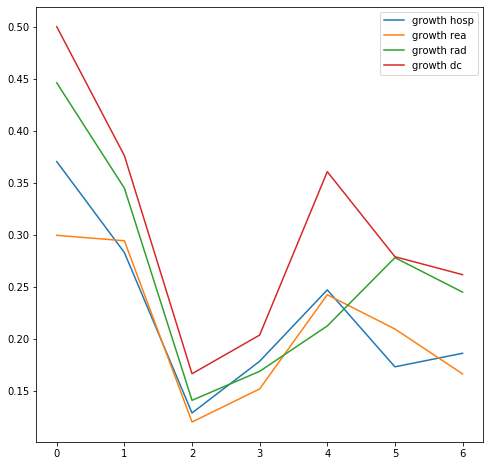

In [33]:
fig, ax = plt.subplots(1, figsize=(8,8))
for d in ["hosp", "rea", "rad", "dc"]:
    ax.plot(aggregated_data["ratio_"+d], label="growth " + d)
plt.legend()
#ax.set_yscale('log')
plt.show()